In [1]:
import pandas as pd
import random

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/var/folders/ck/qnhpj7xj5f92bf7fj7w9b6kr0000gn/T/ipykernel_12567/3419231165.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# READING DATAFRAME


In [2]:
df = pd.read_csv("ds_salaries.csv")
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [3]:
from utils import generate_working_hour_means, generate_working_hours

distribution_mean = generate_working_hour_means(df)
df = generate_working_hours(df, distribution_mean)

In [4]:
print(df.weekly_hours)

0       45.420400
1       45.665816
2       54.333270
3       41.480397
4       39.337231
          ...    
3750    43.908230
3751    49.043346
3752    44.354586
3753    51.665071
3754    58.039947
Name: weekly_hours, Length: 3755, dtype: float64


In [5]:
import numpy as np

# Define a function to generate ages based on experience level
def generate_age(experience_level):
    if experience_level == "SE":
        # Normal distribution, most between 35 and 45
        return int(np.random.normal(loc=40, scale=5))
    elif experience_level == "EX":
        # Most between 47.5 and 57.5
        return int(np.random.normal(loc=52.5, scale=5))
    elif experience_level == "MI":
        return int(np.random.normal(loc=30, scale=5))  # Most between 25 and 35
    elif experience_level == "EN":
        # Most between 18 and 25
        return int(np.random.normal(loc=21.5, scale=2.5))
    else:
        return None


# Apply the function to create the 'age' column
df['age'] = df['experience_level'].apply(generate_age)

In [6]:

# Define a function to generate gender based on salary

def generate_gender(salary):
    # Adjust mean and standard deviation as needed
    male_mean, male_std = 80000, 15000
    female_mean, female_std = 60000, 15000

    # Generate salary based on gender
    if np.random.rand() < 0.5:  # 50% chance for each gender
        return "Male" if salary > np.random.normal(male_mean, male_std) else "Female"
    else:
        return "Female" if salary < np.random.normal(female_mean, female_std) else "Male"


# Apply the function to create the 'gender' column
df['gender'] = df['salary_in_usd'].apply(generate_gender)

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender'],
      dtype='object')

In [8]:
# Generate random birthday based on their already generated age
def generate_birthday(row):
    birth_year = row['work_year'] - row['age']
    birth_month = np.random.randint(1, 13)  # Random month between 1 and 12
    birth_day = np.random.randint(1, 29)  # Random day, simplified to 28 to accommodate all months
    birth_hour = np.random.randint(0, 24)  # Random hour
    birth_minute = np.random.randint(0, 60)  # Random minute
    birth_second = np.random.randint(0, 60)  # Random second
    # Combine into a birthday string
    birthday = f"{birth_year}-{birth_month:02d}-{birth_day:02d} {birth_hour:02d}:{birth_minute:02d}:{birth_second:02d}"
    return birthday

# Apply function to generate birthday for each row
df['birthday'] = df.apply(generate_birthday, axis=1)

# Display the updated DataFrame
df[['work_year', 'age', 'gender', 'birthday']]


,work_year,age,gender,birthday
0,2023,39,Male,1984-02-04 18:46:29
1,2023,31,Female,1992-10-22 17:15:42
2,2023,27,Female,1996-04-26 16:51:12
3,2023,52,Male,1971-06-15 19:45:09
4,2023,28,Male,1995-04-14 06:06:52
...,...,...,...,...
3750,2020,36,Male,1984-12-27 03:24:08
3751,2021,33,Male,1988-12-27 06:43:28
3752,2020,25,Male,1995-10-05 10:44:31
3753,2020,19,Male,2001-11-28 03:40:26


In [9]:
countries_df = df['employee_residence'].value_counts().reset_index()
countries_df.columns = ['Country Code', 'Count']
countries_df.to_excel('countries_df.xlsx')

/var/folders/ck/qnhpj7xj5f92bf7fj7w9b6kr0000gn/T/ipykernel_12567/3447105332.py:3: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  countries_df.to_excel('countries_df.xlsx')


In [10]:
# Generate a birth longitude and latitute (it is necessary for birthcharts), we will assume they are all born in their country of residence
# and in the same central point within that country

country_coordinates = {
    'US': (-77.0369, 38.9072),  # Washington, D.C., USA
    'GB': (-0.1278, 51.5074),   # London, UK
    'CA': (-75.6972, 45.4215),  # Ottawa, Canada
    'ES': (-3.7038, 40.4168),   # Madrid, Spain
    'IN': (77.2090, 28.6139),   # New Delhi, India
    'DE': (13.4050, 52.5200),   # Berlin, Germany
    'FR': (2.3522, 48.8566),    # Paris, France
    'PT': (-9.1393, 38.7223),   # Lisbon, Portugal
    'BR': (-47.8825, -15.7942), # Brasília, Brazil
    'GR': (23.7275, 37.9838),   # Athens, Greece
    'NL': (4.9041, 52.3676),    # Amsterdam, Netherlands
    'AU': (149.1300, -35.2809), # Canberra, Australia
    'MX': (-99.1332, 19.4326),  # Mexico City, Mexico
    'IT': (12.4964, 41.9028),   # Rome, Italy
    'PK': (73.0479, 33.6844),   # Islamabad, Pakistan
    'IE': (-6.2603, 53.3498),   # Dublin, Ireland
    'JP': (139.6917, 35.6895),  # Tokyo, Japan
    'NG': (7.4951, 9.0579),     # Abuja, Nigeria
    'AR': (-58.3816, -34.6037), # Buenos Aires, Argentina
    'PL': (21.0122, 52.2297),   # Warsaw, Poland
    'AT': (16.3738, 48.2082),   # Vienna, Austria
    'SG': (103.8198, 1.3521),     # Singapore
    'TR': (32.8597, 39.9334),     # Ankara, Turkey
    'PR': (-66.1057, 18.4655),    # San Juan, Puerto Rico
    'BE': (4.3517, 50.8503),      # Brussels, Belgium
    'CH': (7.4474, 46.9479),      # Bern, Switzerland
    'UA': (30.5234, 50.4501),     # Kyiv, Ukraine
    'CO': (-74.0721, 4.7110),     # Bogotá, Colombia
    'LV': (24.1052, 56.9496),     # Riga, Latvia
    'SI': (14.5058, 46.0569),     # Ljubljana, Slovenia
    'RU': (37.6173, 55.7558),     # Moscow, Russia
    'VN': (105.8342, 21.0278),    # Hanoi, Vietnam
    'HR': (15.9819, 45.8150),     # Zagreb, Croatia
    'TH': (100.5018, 13.7563),    # Bangkok, Thailand
    'BO': (-68.1193, -16.4897),   # Sucre, Bolivia
    'DK': (12.5683, 55.6761),     # Copenhagen, Denmark
    'HU': (19.0402, 47.4979),     # Budapest, Hungary
    'RO': (26.1025, 44.4268),     # Bucharest, Romania
    'AE': (54.3773, 24.4539),     # Abu Dhabi, United Arab Emirates
    'KE': (36.8219, -1.2921),     # Nairobi, Kenya
    'LT': (25.2799, 54.6872),     # Vilnius, Lithuania
    'SE': (18.0686, 59.3293),     # Stockholm, Sweden
    'UZ': (69.2401, 41.2995),     # Tashkent, Uzbekistan
    'HK': (114.1095, 22.3964),    # Hong Kong
    'CF': (18.5582, 4.3947),      # Bangui, Central African Republic
    'CZ': (14.4378, 50.0755),     # Prague, Czech Republic
    'CL': (-70.6483, -33.4489),   # Santiago, Chile
    'FI': (24.9384, 60.1699),     # Helsinki, Finland
    'AS': (-170.1322, -14.2756),  # Pago Pago, American Samoa
    'PH': (120.9842, 14.5995),    # Manila, Philippines
    'GH': (-0.1869, 5.6037),      # Accra, Ghana
    'AM': (44.5092, 40.1872),     # Yerevan, Armenia
    'BA': (18.4131, 43.8563),     # Sarajevo, Bosnia and Herzegovina
    'BG': (23.3219, 42.6977),     # Sofia, Bulgaria
    'HN': (-87.2068, 14.0723),    # Tegucigalpa, Honduras
    'EE': (24.7536, 59.4370),     # Tallinn, Estonia
    'CY': (33.3823, 35.1856),     # Nicosia, Cyprus
    'KW': (47.4818, 29.3117),     # Kuwait City, Kuwait
    'TN': (10.1658, 36.8188),     # Tunis, Tunisia
    'DZ': (3.0588, 36.7538),      # Algiers, Algeria
    'IQ': (44.3661, 33.3152),     # Baghdad, Iraq
    'MK': (21.4275, 41.9981),     # Skopje, North Macedonia
    'CN': (116.4074, 39.9042),    # Beijing, China
    'SK': (17.1077, 48.1486),     # Bratislava, Slovakia
    'IR': (51.3890, 35.6892),     # Tehran, Iran
    'MA': (-6.8498, 33.9716),     # Rabat, Morocco
    'IL': (35.2137, 31.7683),     # Jerusalem, Israel
    'CR': (-84.0833, 9.9333),     # San José, Costa Rica
    'EG': (31.2357, 30.0444),     # Cairo, Egypt
    'DO': (-69.9312, 18.4861),    # Santo Domingo, Dominican Republic
    'ID': (106.8456, -6.2088),    # Jakarta, Indonesia
    'MY': (101.6869, 3.1390),     # Kuala Lumpur, Malaysia
    'JE': (-2.1312, 49.2138),     # Saint Helier, Jersey
    'RS': (20.4489, 44.7866),     # Belgrade, Serbia
    'NZ': (174.7762, -41.2865),   # Wellington, New Zealand
    'MD': (28.8575, 47.0105),     # Chișinău, Moldova
    'LU': (6.1303, 49.6116),      # Luxembourg City, Luxembourg
    'MT': (14.5146, 35.8989),     # Valletta, Malta
}

# Function to retrieve coordinates based on country code
def get_coordinates(country_code):
    return country_coordinates.get(country_code, (None, None))
df['longitude'] = df['employee_residence'].apply(lambda x: get_coordinates(x)[0])
df['latitude'] = df['employee_residence'].apply(lambda x: get_coordinates(x)[1])

df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,weekly_hours,age,gender,birthday,longitude,latitude
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,45.420400,39,Male,1984-02-04 18:46:29,-3.7038,40.4168
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,45.665816,31,Female,1992-10-22 17:15:42,-77.0369,38.9072
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,54.333270,27,Female,1996-04-26 16:51:12,-77.0369,38.9072
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,41.480397,52,Male,1971-06-15 19:45:09,-75.6972,45.4215
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,39.337231,28,Male,1995-04-14 06:06:52,-75.6972,45.4215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,43.908230,36,Male,1984-12-27 03:24:08,-77.0369,38.9072
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,49.043346,33,Male,1988-12-27 06:43:28,-77.0369,38.9072
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,44.354586,25,Male,1995-10-05 10:44:31,-77.0369,38.9072
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,51.665071,19,Male,2001-11-28 03:40:26,-77.0369,38.9072


In [11]:

from datetime import datetime
import swisseph as swe
import pandas as pd

def calculate_celestial_bodies(row):
    from datetime import datetime
    import swisseph as swe
    
    birth_datetime = datetime.strptime(row['birthday'], '%Y-%m-%d %H:%M:%S')
    jd_ut = swe.julday(birth_datetime.year, birth_datetime.month, birth_datetime.day,
                       birth_datetime.hour + birth_datetime.minute / 60 + birth_datetime.second / 3600)
    
    sun_pos = swe.calc_ut(jd_ut, swe.SUN)[0][0]
    moon_pos = swe.calc_ut(jd_ut, swe.MOON)[0][0]
    asc_pos = swe.houses(jd_ut, row['latitude'], row['longitude'], b'P')[0][0]
    
    return pd.Series({
        'sun_position': sun_pos,
        'moon_position': moon_pos,
        'ascendant': asc_pos,
    })


In [12]:
celestial_results = df.apply(calculate_celestial_bodies, axis=1)
for col in celestial_results.columns:
    df[col] = celestial_results[col]

In [13]:
# Define the function to get zodiac sign based on longitude
def get_zodiac_sign(longitude):
    sign_ranges = [
        ("Aries", (0, 30)), ("Taurus", (30, 60)), ("Gemini", (60, 90)),
        ("Cancer", (90, 120)), ("Leo", (120, 150)), ("Virgo", (150, 180)),
        ("Libra", (180, 210)), ("Scorpio", (210, 240)), ("Sagittarius", (240, 270)),
        ("Capricorn", (270, 300)), ("Aquarius", (300, 330)), ("Pisces", (330, 360))
    ]
    
    for sign, (start, end) in sign_ranges:
        if start <= longitude < end:
            return sign
    
    # Handle the special case for Pisces (330° to 360° and 0° to 30°)
    if longitude == 360 or longitude < 30:
        return "Pisces"
    
    return "Unknown"

# Apply the get_zodiac_sign function to each column and create new columns for zodiac sign names
df['sun_sign'] = df['sun_position'].apply(get_zodiac_sign)
df['moon_sign'] = df['moon_position'].apply(get_zodiac_sign)
df['ascendant_sign'] = df['ascendant'].apply(get_zodiac_sign)

# Display the DataFrame with zodiac sign names
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,gender,birthday,longitude,latitude,sun_position,moon_position,ascendant,sun_sign,moon_sign,ascendant_sign
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,Male,1984-02-04 18:46:29,-3.7038,40.4168,315.146343,345.529042,149.924546,Aquarius,Pisces,Leo
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,Female,1992-10-22 17:15:42,-77.0369,38.9072,209.556344,166.910020,282.300498,Libra,Virgo,Capricorn
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,Female,1996-04-26 16:51:12,-77.0369,38.9072,36.728935,135.945147,132.578023,Taurus,Leo,Leo
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,Male,1971-06-15 19:45:09,-75.6972,45.4215,84.049873,350.943429,205.673432,Gemini,Pisces,Libra
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,Male,1995-04-14 06:06:52,-75.6972,45.4215,23.838533,186.965845,281.531488,Aries,Libra,Capricorn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,Male,1984-12-27 03:24:08,-77.0369,38.9072,275.564385,331.596641,163.713687,Capricorn,Pisces,Virgo
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,Male,1988-12-27 06:43:28,-77.0369,38.9072,275.739879,143.091440,203.982155,Capricorn,Leo,Libra
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,Male,1995-10-05 10:44:31,-77.0369,38.9072,191.725390,331.812937,186.244115,Libra,Pisces,Libra
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,Male,2001-11-28 03:40:26,-77.0369,38.9072,245.969226,33.448238,144.047631,Sagittarius,Taurus,Leo


In [14]:
# Define a dictionary mapping zodiac signs to their elemental types
element_mapping = {
    'Aries': 'Fire', 'Taurus': 'Earth', 'Gemini': 'Air', 'Cancer': 'Water',
    'Leo': 'Fire', 'Virgo': 'Earth', 'Libra': 'Air', 'Scorpio': 'Water',
    'Sagittarius': 'Fire', 'Capricorn': 'Earth', 'Aquarius': 'Air', 'Pisces': 'Water'
}

# Map the zodiac signs to their elemental types and create a new column for the sign type
df['sign_type'] = df['sun_sign'].map(element_mapping)

# Display the DataFrame with zodiac sign names and sign types
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,birthday,longitude,latitude,sun_position,moon_position,ascendant,sun_sign,moon_sign,ascendant_sign,sign_type
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,1984-02-04 18:46:29,-3.7038,40.4168,315.146343,345.529042,149.924546,Aquarius,Pisces,Leo,Air
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,1992-10-22 17:15:42,-77.0369,38.9072,209.556344,166.910020,282.300498,Libra,Virgo,Capricorn,Air
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,1996-04-26 16:51:12,-77.0369,38.9072,36.728935,135.945147,132.578023,Taurus,Leo,Leo,Earth
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,1971-06-15 19:45:09,-75.6972,45.4215,84.049873,350.943429,205.673432,Gemini,Pisces,Libra,Air
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,1995-04-14 06:06:52,-75.6972,45.4215,23.838533,186.965845,281.531488,Aries,Libra,Capricorn,Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,1984-12-27 03:24:08,-77.0369,38.9072,275.564385,331.596641,163.713687,Capricorn,Pisces,Virgo,Earth
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,1988-12-27 06:43:28,-77.0369,38.9072,275.739879,143.091440,203.982155,Capricorn,Leo,Libra,Earth
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,1995-10-05 10:44:31,-77.0369,38.9072,191.725390,331.812937,186.244115,Libra,Pisces,Libra,Air
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,2001-11-28 03:40:26,-77.0369,38.9072,245.969226,33.448238,144.047631,Sagittarius,Taurus,Leo,Fire


In [15]:
import pandas as pd
import swisseph as swe

def assign_planets_to_houses(df):
    planets = {
        'Sun': swe.SUN,
        'Moon': swe.MOON,
        'Mercury': swe.MERCURY,
        'Venus': swe.VENUS,
        'Mars': swe.MARS,
        'Jupiter': swe.JUPITER,
        'Saturn': swe.SATURN,
        'Uranus': swe.URANUS,
        'Neptune': swe.NEPTUNE,
        'Pluto': swe.PLUTO,
    }

    # Initialize columns for each planet
    for planet in planets.keys():
        df[planet] = None

    house_system = 'P'  # Placidus

    for index, row in df.iterrows():
        try:
            jd = swe.julday(int(row['birthday'][:4]), int(row['birthday'][5:7]), int(row['birthday'][8:10]),
                            hour=int(row['birthday'][11:13]) + int(row['birthday'][14:16])/60 + int(row['birthday'][17:19])/3600)

            cusps, ascmc = swe.houses(jd, row['latitude'], row['longitude'], house_system.encode('utf-8'))

            for planet_name, planet_id in planets.items():
                planet_degree = swe.calc_ut(jd, planet_id)[0][0]
                house_num = None
                for i in range(1, 13):
                    if i == 12:
                        if planet_degree >= cusps[i] or planet_degree < cusps[1]:
                            house_num = i
                            break
                    else:
                        if cusps[i] <= planet_degree < cusps[i+1]:
                            house_num = i
                            break

                if house_num is not None:
                    df.at[index, planet_name] = house_num
        except Exception as e:
            print(f"An error occurred at index {index}: {e}")
            # Optionally, handle specific cases or log the error details

    return df

df= assign_planets_to_houses(df)

An error occurred at index 1: tuple index out of range
An error occurred at index 2: tuple index out of range
An error occurred at index 3: tuple index out of range
An error occurred at index 4: tuple index out of range
An error occurred at index 6: tuple index out of range
An error occurred at index 7: tuple index out of range
An error occurred at index 8: tuple index out of range
An error occurred at index 10: tuple index out of range
An error occurred at index 11: tuple index out of range
An error occurred at index 12: tuple index out of range
An error occurred at index 14: tuple index out of range
An error occurred at index 15: tuple index out of range
An error occurred at index 16: tuple index out of range
An error occurred at index 17: tuple index out of range
An error occurred at index 18: tuple index out of range
An error occurred at index 19: tuple index out of range
An error occurred at index 20: tuple index out of range
An error occurred at index 21: tuple index out of range


An error occurred at index 254: tuple index out of range
An error occurred at index 255: tuple index out of range
An error occurred at index 256: tuple index out of range
An error occurred at index 257: tuple index out of range
An error occurred at index 259: tuple index out of range
An error occurred at index 260: tuple index out of range
An error occurred at index 262: tuple index out of range
An error occurred at index 263: tuple index out of range
An error occurred at index 264: tuple index out of range
An error occurred at index 265: tuple index out of range
An error occurred at index 267: tuple index out of range
An error occurred at index 268: tuple index out of range
An error occurred at index 269: tuple index out of range
An error occurred at index 271: tuple index out of range
An error occurred at index 272: tuple index out of range
An error occurred at index 273: tuple index out of range
An error occurred at index 274: tuple index out of range
An error occurred at index 275

In [16]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,5,6,4,4,2,4,2,3,4,2
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,8,7,9,10,6,7,None,None,None,None
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,9,None,None,None,None,None,None,None,None,None
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,7,None,None,None,None,None,None,None,None,None
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,2,7,2,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,3,5,3,5,5,4,2,3,3,1
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,2,9,2,1,None,None,None,None,None,None
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,None,None,None,None,None,None,None,None,None,None
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,3,8,3,3,5,10,9,5,5,3


# DATA CLEANING


In [17]:
# check for missing
df.isnull().sum()


work_year                0
experience_level         0
employment_type          0
job_title                0
salary                   0
salary_currency          0
salary_in_usd            0
employee_residence       0
remote_ratio             0
company_location         0
company_size             0
weekly_hours             0
age                      0
gender                   0
birthday                 0
longitude                0
latitude                 0
sun_position             0
moon_position            0
ascendant                0
sun_sign                 0
moon_sign                0
ascendant_sign           0
sign_type                0
Sun                    862
Moon                  1564
Mercury               1739
Venus                 2017
Mars                  2336
Jupiter               2618
Saturn                2842
Uranus                2963
Neptune               3008
Pluto                 3110
dtype: int64

In [18]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender', 'birthday', 'longitude', 'latitude', 'sun_position',
       'moon_position', 'ascendant', 'sun_sign', 'moon_sign', 'ascendant_sign',
       'sign_type', 'Sun', 'Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto'],
      dtype='object')

In [19]:
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,5,6,4,4,2,4,2,3,4,2
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,8,7,9,10,6,7,None,None,None,None
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,9,None,None,None,None,None,None,None,None,None
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,7,None,None,None,None,None,None,None,None,None
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,2,7,2,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,3,5,3,5,5,4,2,3,3,1
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,2,9,2,1,None,None,None,None,None,None
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,None,None,None,None,None,None,None,None,None,None
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,3,8,3,3,5,10,9,5,5,3


In [20]:
# Check for duplicates
df.duplicated().sum()

0

In [21]:
columns_to_drop = ['longitude', 'latitude', 'sun_position', 'moon_position', 'ascendant']
df = df.drop(columns=columns_to_drop)
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender', 'birthday', 'sun_sign', 'moon_sign', 'ascendant_sign',
       'sign_type', 'Sun', 'Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto'],
      dtype='object')

In [22]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,5,6,4,4,2,4,2,3,4,2
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,8,7,9,10,6,7,None,None,None,None
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,9,None,None,None,None,None,None,None,None,None
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,7,None,None,None,None,None,None,None,None,None
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,2,7,2,None,None,None,None,None,None,None


In [23]:
df.to_csv('df_salaries.csv', index=False)

# Plots


In [24]:
df.remote_ratio.unique()

array([100,   0,  50])

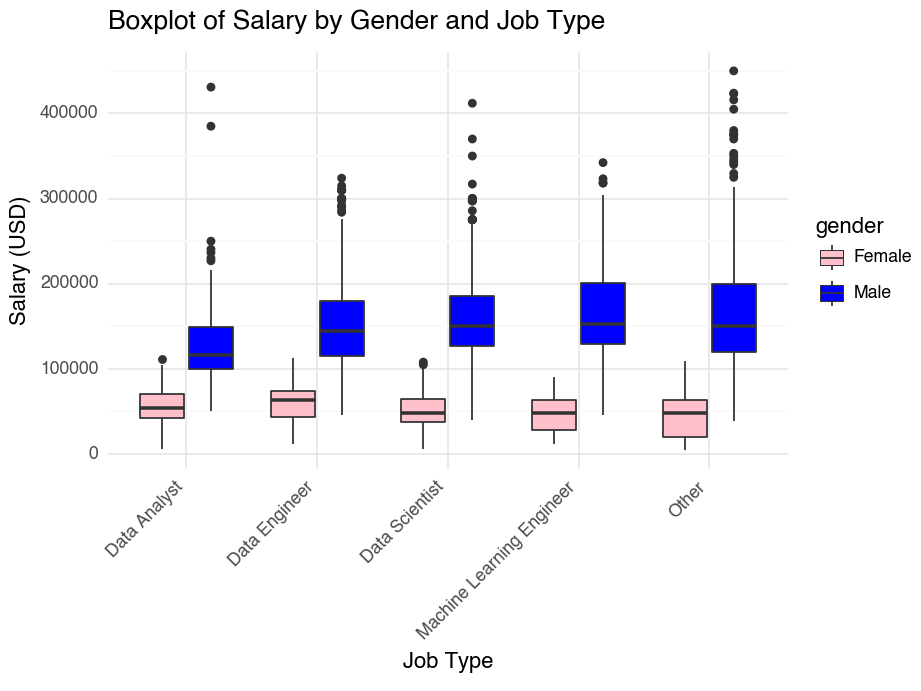

In [25]:
from plotnine import ggplot, aes, geom_boxplot, theme_minimal, labs, scale_fill_manual, theme, element_text


top_job_titles = df['job_title'].value_counts().nlargest(4).index
df['job_title_grouped'] = df['job_title'].apply(
    lambda x: x if x in top_job_titles else 'Other')

# Plotting using plotnine
plot = (
    ggplot(df, aes(x='job_title_grouped', y='salary_in_usd', fill='gender')) +
    geom_boxplot() +
    labs(title='Boxplot of Salary by Gender and Job Type', x='Job Type', y='Salary (USD)') +
    theme_minimal() +
    scale_fill_manual(values={'Male': 'blue', 'Female': 'pink'}) +
    # Set the angle to 45 degrees
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

# Show the plot
print(plot)

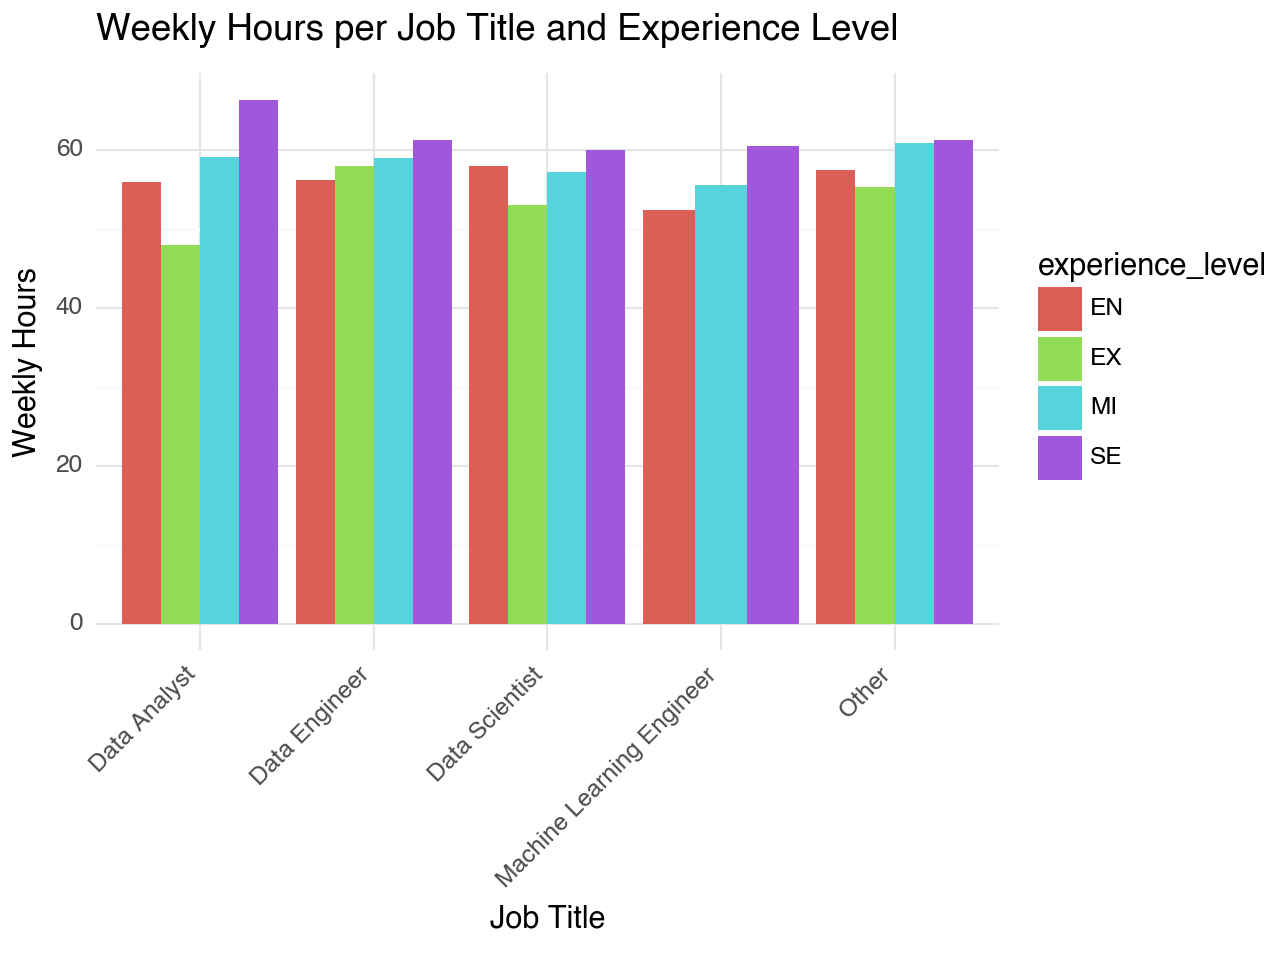

In [26]:

from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, theme, element_text


top_job_titles = df['job_title'].value_counts().nlargest(4).index
df['job_title_grouped'] = df['job_title'].apply(
    lambda x: x if x in top_job_titles else 'Other')

# Plotting using plotnine
plot = (
    ggplot(df, aes(x='job_title_grouped', y='weekly_hours', fill='experience_level')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Weekly Hours per Job Title and Experience Level',
         x='Job Title', y='Weekly Hours') +
    theme_minimal() +
    # Set the angle to 45 degrees
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

# Show the plot
print(plot)

In [27]:
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, theme, element_blank
from plotnine.coords import coord_polar


plot = (
    ggplot(df, aes(x='', fill='remote_category')) +
    geom_bar(width=1, color='white') +
    coord_polar(theta='y') +
    labs(title='Remote Ratio Distribution',
         fill='Remote Category') +
    theme_minimal() +
    theme(axis_text_x=element_blank())  # Remove x-axis labels
)

# Show the plot
print(plot)

ImportError: cannot import name 'coord_polar' from 'plotnine.coords' (/opt/anaconda3/lib/python3.9/site-packages/plotnine/coords/__init__.py)